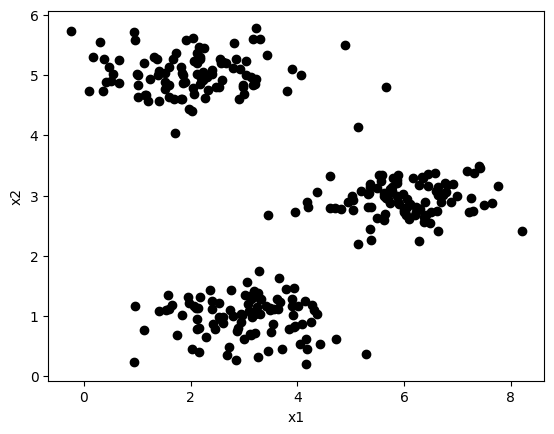

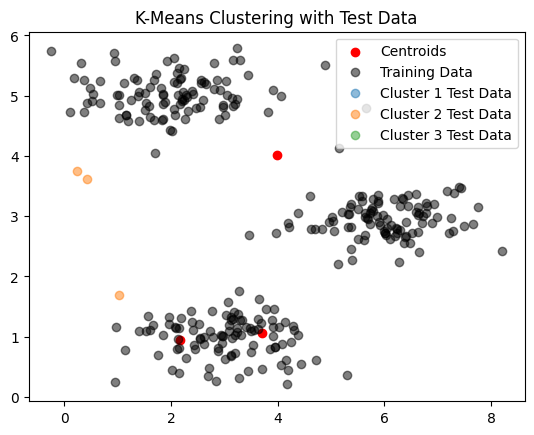

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the input data
data = pd.read_csv("./data_kmeans.txt", sep=" ", header=None)
X = pd.DataFrame(data).to_numpy()

# hyper-parameters
np.random.seed(seed=3)
K = 3
ITERA_MAX = 20
I = X.shape[0]

# find the bounds of the data coordinates
x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])
x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])


# plot data
plt.figure()
plt.plot(X[:,0],X[:,1],'ko')
plt.xlabel('x1')
plt.ylabel('x2')

# initialize randomly cluster centroids
mu = np.random.rand(K,2)

# repeat until convergence
for i in range (ITERA_MAX):
    d = np.sqrt(((X[:, np.newaxis] - mu)**2).sum(axis=2))
    y_pred = np.argmin(d, axis=1)

    new_mu = np.zeros_like(mu)
    for k in range(K):
        if np.sum(y_pred == k) > 0:
            N_k = np.sum(y_pred == k)
            new_mu[k] = np.sum(X[y_pred == k], axis=0) / N_k

    if np.array_equal(mu, new_mu):
        break

    mu = new_mu

# test your model with some new data
data_test = np.random.uniform(low=0.0, high=8.2, size = (3,2))


# predict clusters for the new test data
d_test = np.sqrt(((data_test[:, np.newaxis, :] - mu)**2).sum(axis=2))
y_test_pred = np.argmin(d_test, axis=1)

# plot both training and test results in a 2D graph
plt.figure()
plt.scatter(mu[:, 0], mu[:, 1], color="red", label='Centroids')
plt.scatter(X[:, 0], X[:, 1], color='black', alpha=0.5, label='Training Data')

for k in range(K):
    plt.scatter(data_test[y_test_pred == k, 0], data_test[y_test_pred == k, 1], alpha=0.5, label=f'Cluster {k+1} Test Data')

plt.legend()
plt.title('K-Means Clustering with Test Data')
plt.show()